In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from parsers.phenx_toolkit import *
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
path = '/Volumes/GoogleDrive/Shared drives/NIAAA_ASSIST/Data/PH2'
uta = 'UTA_terms.xlsx'
brain1 = 'AUD_AUDIT_report_for_researcher.xlsx'
brain2 = 'AUD_report_for_researcher.xlsx'
phenx_dir = 'Phenx_Terms'

1. Look through Laura's injects and build draft scope of the terms.
2. Look up the ontologies listed from NIH (like PhenX) and pull the terms. 
3. Compare the list of terms from Laura to the PhenX terms.
4. We are going to take a bottom-up approach to the ontology. See how clusters of PhenX terms line up in their hierarchy. Same goes for Laura's terms.

In [163]:
terms = parse_files(os.path.join(path,phenx_dir))
phenx_terms = get_all_term_names(terms)

'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'
'VARNAME'


In [164]:
len(terms)

29254

In [165]:
from sentence_transformers import SentenceTransformer

In [166]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [167]:
phenx_embeddings = model.encode(phenx_terms)

In [168]:
phenx_embeddings.shape

(29254, 384)

In [169]:
brain1_df = pd.read_excel(os.path.join(path,brain1))
brain2_df = pd.read_excel(os.path.join(path,brain2))
brain=pd.concat([brain1_df,brain2_df],ignore_index=True)

In [170]:
brain['Term'] = brain['Term'].str.replace('_',' ')

In [171]:
brain_embeddings = model.encode(brain['Term'])

In [172]:
brain_embeddings.shape

(78, 384)

In [173]:
from sklearn.metrics import pairwise_distances
dist_brain = np.abs(pairwise_distances(X=brain_embeddings,Y=phenx_embeddings,metric='cosine'))

In [174]:
dist.shape

(452, 20870)

In [176]:
for j in range(10):
    brain['Phenx_'+str(j)]=[phenx_terms[i] for i in np.argsort(dist_brain,axis=1)[:,j]]

In [177]:
brain.to_csv(os.path.join(path,'all-MiniLM-L6-v2_brain_phenx.csv'))

In [178]:
uta_df = pd.read_excel(os.path.join(path,uta))


In [179]:
uta_df.rename({uta_df.columns[0]:'Term'},inplace=True,axis=1)

In [180]:
uta_embeddings = model.encode(uta_df['Term'])

In [181]:
dist_uta = np.abs(pairwise_distances(X=uta_embeddings,Y=phenx_embeddings,metric='cosine'))

In [182]:
for j in range(10):
    uta_df['Phenx_'+str(j)]=[phenx_terms[i] for i in np.argsort(dist_uta,axis=1)[:,j]]

In [183]:
uta_df.to_csv(os.path.join(path,'all-MiniLM-L6-v2_uta_phenx.csv'))

<AxesSubplot:ylabel='Count'>

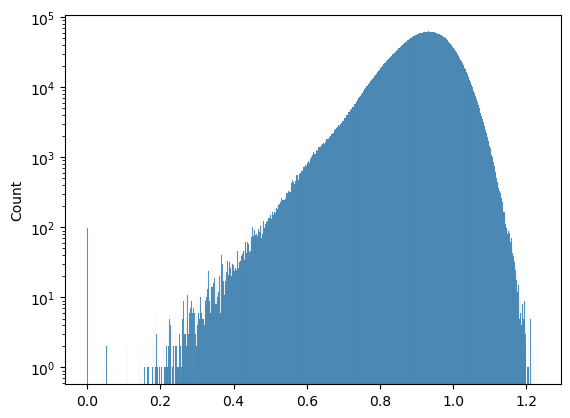

In [196]:
sns.histplot(dist_uta.flatten(),log_scale=(False,10))

<AxesSubplot:ylabel='Count'>

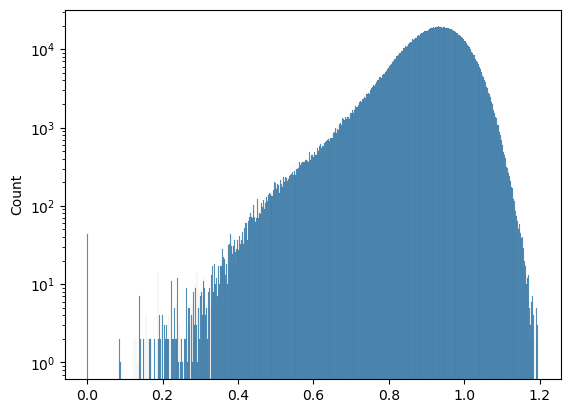

In [195]:
sns.histplot(dist_brain.flatten(),log_scale=(False,10))